## **Seoul Bike Count Prediction**


## **Importing Libraries**

In [407]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style='white', color_codes=True)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## **Importing data and overview**

In [408]:
dataset = pd.read_csv('SeoulBikeData.csv')
print("Dimension of dataset", dataset.shape)

Dimension of dataset (8760, 14)


In [409]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [410]:
dataset.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [411]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

# **Checking for Missing values**

In [412]:
miss_val = dataset.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

### **Checking and Removing Outliers**

In [413]:
dataset_numeric = dataset.select_dtypes(include=['float64', 'int64'])
dataset_numeric

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [414]:
dataset_numeric.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

**Rented Bike Count**

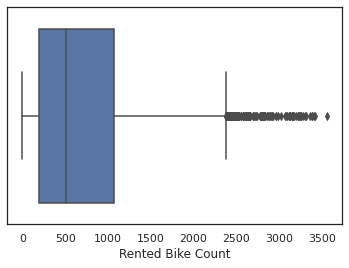

In [415]:
sns.boxplot(dataset_numeric['Rented Bike Count'])
plt.show()

In [416]:
Q1 = np.percentile(dataset_numeric['Rented Bike Count'], 25)
Q2 = np.percentile(dataset_numeric['Rented Bike Count'], 50)
Q3 = np.percentile(dataset_numeric['Rented Bike Count'], 75)

IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit, upper_limit)

dataset_numeric = dataset_numeric[dataset_numeric['Rented Bike Count']<upper_limit]

-1120.375 2376.625


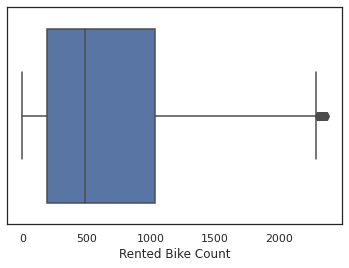

In [417]:
sns.boxplot(dataset_numeric['Rented Bike Count'])
plt.show()

**Hour**

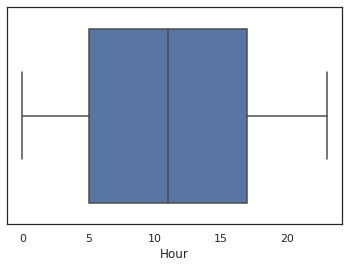

In [418]:
sns.boxplot(dataset_numeric['Hour'])
plt.show()

**Temperature(C)**

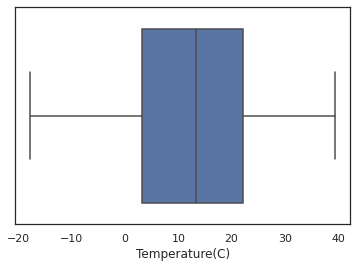

In [419]:
sns.boxplot(dataset_numeric['Temperature(C)'])
plt.show()

**Humidity(%)**

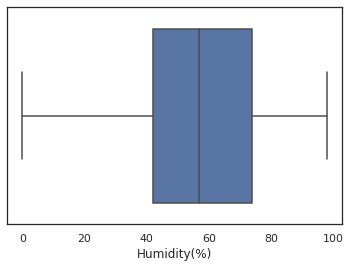

In [420]:
sns.boxplot(dataset_numeric['Humidity(%)'])
plt.show()

**Wind speed (m/s)**

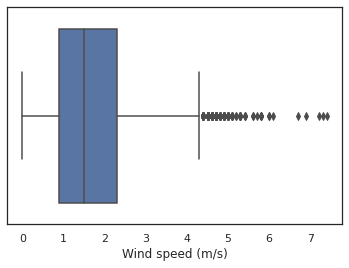

In [421]:
sns.boxplot(dataset_numeric['Wind speed (m/s)'])
plt.show()

In [422]:
Q1 = np.percentile(dataset_numeric['Wind speed (m/s)'], 25)
Q2 = np.percentile(dataset_numeric['Wind speed (m/s)'], 50)
Q3 = np.percentile(dataset_numeric['Wind speed (m/s)'], 75)

IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit, upper_limit)

dataset_numeric = dataset_numeric[dataset_numeric['Wind speed (m/s)']<upper_limit]


-1.1999999999999997 4.3999999999999995


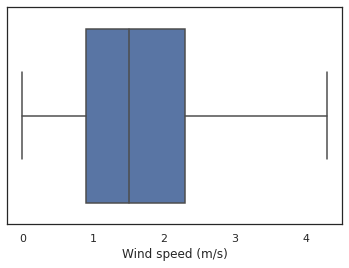

In [423]:
sns.boxplot(dataset_numeric['Wind speed (m/s)'])
plt.show()

**Visibility (10m)**

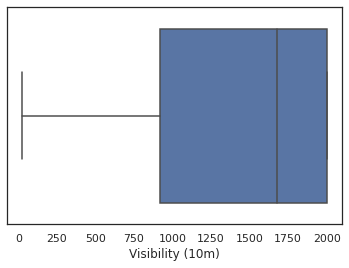

In [424]:
sns.boxplot(dataset_numeric['Visibility (10m)'])
plt.show()

**Dew point temperature(C)**

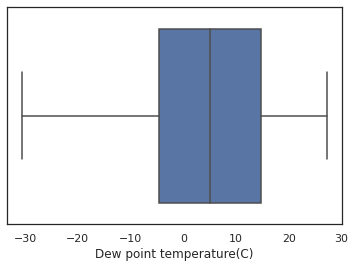

In [425]:
sns.boxplot(dataset_numeric['Dew point temperature(C)'])
plt.show()

**Solar Radiation (MJ/m2)**

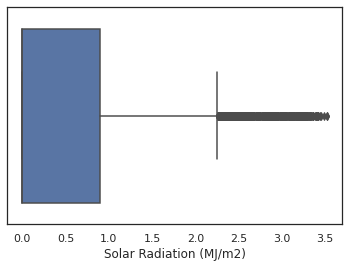

In [426]:
sns.boxplot(dataset_numeric['Solar Radiation (MJ/m2)'])
plt.show()

In [427]:
Q1 = np.percentile(dataset_numeric['Solar Radiation (MJ/m2)'], 25)
Q2 = np.percentile(dataset_numeric['Solar Radiation (MJ/m2)'], 50)
Q3 = np.percentile(dataset_numeric['Solar Radiation (MJ/m2)'], 75)

IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit, upper_limit)

dataset_numeric = dataset_numeric[dataset_numeric['Solar Radiation (MJ/m2)']<upper_limit]


-1.35 2.25


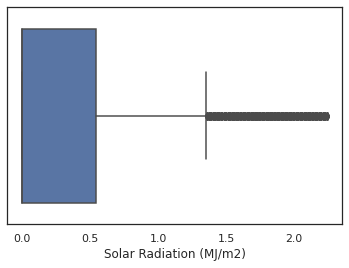

In [428]:
sns.boxplot(dataset_numeric['Solar Radiation (MJ/m2)'])
plt.show()

In [429]:
dataset_numeric.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [430]:
dataset_numeric.isna().sum()

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
dtype: int64

## **Identifying Categorical Variables**

In [431]:
print('Season_dummy = ', dataset['Seasons'].unique())
print('Holiday_dummy =', dataset['Holiday'].unique())
print('Functioning_day_dummy = ', dataset['Functioning Day'].unique())

Season_dummy =  ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday_dummy = ['No Holiday' 'Holiday']
Functioning_day_dummy =  ['Yes' 'No']


## **Encoding Categorical Variables**

**Encoding Date**

In [432]:
import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'] = dataset['Date'].dt.strftime('%d/%m/%Y')
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day
dataset['dayofyear'] = pd.DatetimeIndex(dataset['Date']).dayofyear
dataset['weekofyear'] = pd.DatetimeIndex(dataset['Date']).weekofyear
dataset['weekday'] = pd.DatetimeIndex(dataset['Date']).weekday
dataset['quarter'] = pd.DatetimeIndex(dataset['Date']).quarter
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
 14  year    

**Encoding dummies**

In [433]:
seasons = pd.get_dummies(dataset["Seasons"], drop_first= True)
holiday = pd.get_dummies(dataset["Holiday"], drop_first= True)
fun_day = pd.get_dummies(dataset["Functioning Day"], drop_first= True)

print(seasons.head(5))
print(holiday.head(5))
print(fun_day.head(5))

   Spring  Summer  Winter
0       0       0       1
1       0       0       1
2       0       0       1
3       0       0       1
4       0       0       1
   No Holiday
0           1
1           1
2           1
3           1
4           1
   Yes
0    1
1    1
2    1
3    1
4    1


In [434]:
dataset['Spring'] = seasons['Spring'].to_list()
dataset['Summer'] = seasons['Summer'].to_list()
dataset['Winter'] = seasons['Winter'].to_list()
dataset['Holiday_new'] = holiday['No Holiday'].to_list()
dataset['Functioning_Day'] = fun_day['Yes'].to_list()
dataset.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),...,day,dayofyear,weekofyear,weekday,quarter,Spring,Summer,Winter,Holiday_new,Functioning_Day
0,12/01/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
1,12/01/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
2,12/01/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
3,12/01/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
4,12/01/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
5,12/01/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
6,12/01/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
7,12/01/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
8,12/01/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,...,1,335,48,4,4,0,0,1,1,1
9,12/01/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,...,1,335,48,4,4,0,0,1,1,1


**Dropping encoded columns**

In [435]:
dataset = dataset.drop(columns=['Date', 'Seasons', 'Holiday', 'Functioning Day'])

In [436]:
dataset_cat = dataset.drop(columns=['Rented Bike Count',	'Hour',	'Temperature(C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',
                                    'Dew point temperature(C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)'])
dataset_cat

,year,month,day,dayofyear,weekofyear,weekday,quarter,Spring,Summer,Winter,Holiday_new,Functioning_Day
0,2017,12,1,335,48,4,4,0,0,1,1,1
1,2017,12,1,335,48,4,4,0,0,1,1,1
2,2017,12,1,335,48,4,4,0,0,1,1,1
3,2017,12,1,335,48,4,4,0,0,1,1,1
4,2017,12,1,335,48,4,4,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018,11,30,334,48,4,4,0,0,0,1,1
8756,2018,11,30,334,48,4,4,0,0,0,1,1
8757,2018,11,30,334,48,4,4,0,0,0,1,1
8758,2018,11,30,334,48,4,4,0,0,0,1,1


**Merging Numerical and Encoded Categorical Variables**

In [437]:
dataset_cat[['Rented Bike Count',	'Hour',	'Temperature(C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',
                                    'Dew point temperature(C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']] = dataset_numeric[['Rented Bike Count',	'Hour',	'Temperature(C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',
                                    'Dew point temperature(C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']]
dataset_cat

,year,month,day,dayofyear,weekofyear,weekday,quarter,Spring,Summer,Winter,...,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,2017,12,1,335,48,4,4,0,0,1,...,254.0,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0
1,2017,12,1,335,48,4,4,0,0,1,...,204.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0
2,2017,12,1,335,48,4,4,0,0,1,...,173.0,2.0,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0
3,2017,12,1,335,48,4,4,0,0,1,...,107.0,3.0,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0
4,2017,12,1,335,48,4,4,0,0,1,...,78.0,4.0,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018,11,30,334,48,4,4,0,0,0,...,1003.0,19.0,4.2,34.0,2.6,1894.0,-10.3,0.0,0.0,0.0
8756,2018,11,30,334,48,4,4,0,0,0,...,764.0,20.0,3.4,37.0,2.3,2000.0,-9.9,0.0,0.0,0.0
8757,2018,11,30,334,48,4,4,0,0,0,...,694.0,21.0,2.6,39.0,0.3,1968.0,-9.9,0.0,0.0,0.0
8758,2018,11,30,334,48,4,4,0,0,0,...,712.0,22.0,2.1,41.0,1.0,1859.0,-9.8,0.0,0.0,0.0


In [438]:
columns = ['Rented Bike Count',	'Hour',	'Temperature(C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',
                                    'Dew point temperature(C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']
for column in columns:
    dataset_cat[column] = dataset_cat[column].fillna(dataset_cat[column].mean())

In [439]:
cols = list(dataset_cat.columns)
dataset_cat = dataset_cat[[cols[12]]+ cols[0:12] + cols[13:22]] 
dataset_cat.head()

,Rented Bike Count,year,month,day,dayofyear,weekofyear,weekday,quarter,Spring,Summer,...,Functioning_Day,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254.0,2017,12,1,335,48,4,4,0,0,...,1,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0
1,204.0,2017,12,1,335,48,4,4,0,0,...,1,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0
2,173.0,2017,12,1,335,48,4,4,0,0,...,1,2.0,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0
3,107.0,2017,12,1,335,48,4,4,0,0,...,1,3.0,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0
4,78.0,2017,12,1,335,48,4,4,0,0,...,1,4.0,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0


In [440]:
dataset_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   float64
 1   year                      8760 non-null   int64  
 2   month                     8760 non-null   int64  
 3   day                       8760 non-null   int64  
 4   dayofyear                 8760 non-null   int64  
 5   weekofyear                8760 non-null   int64  
 6   weekday                   8760 non-null   int64  
 7   quarter                   8760 non-null   int64  
 8   Spring                    8760 non-null   int64  
 9   Summer                    8760 non-null   int64  
 10  Winter                    8760 non-null   int64  
 11  Holiday_new               8760 non-null   int64  
 12  Functioning_Day           8760 non-null   int64  
 13  Hour                      8760 non-null   float64
 14  Temperat

In [441]:
dataset_cat.isna().sum()

Rented Bike Count           0
year                        0
month                       0
day                         0
dayofyear                   0
weekofyear                  0
weekday                     0
quarter                     0
Spring                      0
Summer                      0
Winter                      0
Holiday_new                 0
Functioning_Day             0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
dtype: int64

## **Splitting Dataset into Training and Test set**

In [442]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset_cat, test_size=0.20)

In [443]:
train = train[['Rented Bike Count',	'Hour',	'Temperature(C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',
                                    'Dew point temperature(C)',	'Summer', 'Winter', 'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']]
train.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Summer,Winter,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
191,275.000000,23.000000,-3.500000,43.000000,0.900000,2000.000000,-14.30000,0,1,0.000000,0.00000,0.000000
3946,779.000000,10.000000,16.600000,67.000000,0.900000,479.000000,10.40000,0,0,1.230000,0.00000,0.000000
4643,640.294156,11.177396,11.778854,60.404593,1.598929,1410.588827,3.68515,1,0,0.364359,0.16483,0.083112
2613,731.000000,21.000000,8.000000,47.000000,3.300000,2000.000000,-2.60000,0,0,0.000000,0.00000,0.000000
7286,640.294156,11.177396,11.778854,60.404593,1.598929,1410.588827,3.68515,0,0,0.364359,0.16483,0.083112


In [444]:
test = test[['Rented Bike Count',	'Hour',	'Temperature(C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',
                                    'Dew point temperature(C)',	'Summer', 'Winter', 'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']]
test.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Summer,Winter,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
4536,926.000000,0.000000,19.100000,82.000000,2.200000,874.000000,15.90000,1,0,0.000000,0.00000,0.000000
2412,640.294156,11.177396,11.778854,60.404593,1.598929,1410.588827,3.68515,0,0,0.364359,0.16483,0.083112
5316,1035.000000,12.000000,24.100000,80.000000,0.800000,2000.000000,20.40000,1,0,0.720000,0.00000,0.000000
8184,639.000000,0.000000,11.900000,74.000000,1.600000,287.000000,7.40000,0,0,0.000000,0.00000,0.000000
4790,640.294156,11.177396,11.778854,60.404593,1.598929,1410.588827,3.68515,1,0,0.364359,0.16483,0.083112


In [445]:
train_x = train.drop(['Rented Bike Count'], axis = 1)
train_y = train['Rented Bike Count']           
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)

Dimension of train_x dataframe: (7008, 11)
Dimension of train_y dataframe: (7008,)


In [446]:
test_x = test.drop(['Rented Bike Count'], axis = 1)
test_y = test['Rented Bike Count']           
print('Dimension of train_x dataframe:',test_x.shape)
print('Dimension of train_y dataframe:',test_y.shape)

Dimension of train_x dataframe: (1752, 11)
Dimension of train_y dataframe: (1752,)


## **Constructing Correlation Matrix**

In [448]:
data_corr = train.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Summer,Winter,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.392068,0.533560,-0.158193,0.102169,0.188202,0.383192,0.281100,-0.405574,0.245624,-0.127222,-0.143230
Hour,0.392068,1.000000,0.097723,-0.222141,0.271699,0.087340,-0.010646,-0.018364,0.023558,0.137266,0.014591,-0.014906
Temperature(C),0.533560,0.097723,1.000000,0.260297,-0.076543,0.004247,0.926909,0.611665,-0.712713,0.247084,0.066885,-0.219692
Humidity(%),-0.158193,-0.222141,0.260297,1.000000,-0.293708,-0.546122,0.593228,0.213767,-0.291198,-0.387109,0.238774,0.096944
Wind speed (m/s),0.102169,0.271699,-0.076543,-0.293708,1.000000,0.154250,-0.183581,-0.068710,0.136153,0.288606,-0.006022,0.004277
Visibility (10m),0.188202,0.087340,0.004247,-0.546122,0.154250,1.000000,-0.192987,0.061990,0.023062,0.113072,-0.164299,-0.120286
Dew point temperature(C),0.383192,-0.010646,0.926909,0.593228,-0.183581,-0.192987,1.000000,0.595171,-0.700230,0.041379,0.134975,-0.152944
Summer,0.281100,-0.018364,0.611665,0.213767,-0.068710,0.061990,0.595171,1.000000,-0.331672,0.059334,0.056664,-0.092905
Winter,-0.405574,0.023558,-0.712713,-0.291198,0.136153,0.023062,-0.700230,-0.331672,1.000000,-0.101320,-0.061214,0.214450
Solar Radiation (MJ/m2),0.245624,0.137266,0.247084,-0.387109,0.288606,0.113072,0.041379,0.059334,-0.101320,1.000000,-0.067485,-0.051716


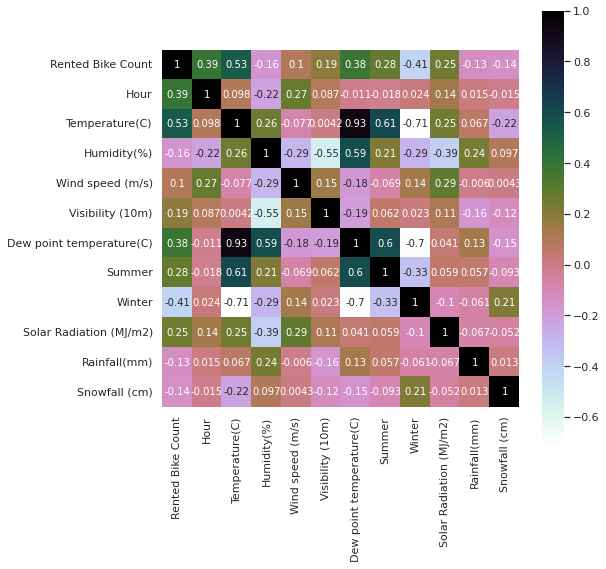

In [449]:
data_corr = train.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data_corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [450]:
data_corr = data_corr['Rented Bike Count'][1:]
data_corr[abs(data_corr)>=0.1].sort_values(ascending =False)

Temperature(C)              0.533560
Hour                        0.392068
Dew point temperature(C)    0.383192
Summer                      0.281100
Solar Radiation (MJ/m2)     0.245624
Visibility (10m)            0.188202
Wind speed (m/s)            0.102169
Rainfall(mm)               -0.127222
Snowfall (cm)              -0.143230
Humidity(%)                -0.158193
Winter                     -0.405574
Name: Rented Bike Count, dtype: float64

## **Training Linear Regression model on the Training set**

In [451]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_x, train_y)

LinearRegression()

In [452]:
from sklearn.metrics import r2_score
pred_train = regressor.predict(train_x)
model_score_train = r2_score(train_y, pred_train)
model_score_train

0.480626140093976

In [453]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

model_pred = regressor.predict(test_x)
model_score= regressor.score(test_x, test_y)
print('Model score is:', model_score)
print('R_Squared Score of linear regression:', r2_score(test_y, model_pred))

Model score is: 0.5013058371894289
R_Squared Score of linear regression: 0.5013058371894289


In [454]:
model_pred

array([ 459.1219477 ,  690.84281397,  879.18772598, ...,  634.2946052 ,
        512.05139132, 1191.80922097])

### Creating Sample Submission file 

In [455]:
submission_data = pd.DataFrame({'Id':test.index,'Pred_Bike_Count':model_pred, "Actual Bike Count": test_y})
submission_data


,Id,Pred_Bike_Count,Actual Bike Count
4536,4536,459.121948,926.000000
2412,2412,690.842814,640.294156
5316,5316,879.187726,1035.000000
8184,8184,319.731629,639.000000
4790,4790,699.177902,640.294156
...,...,...,...
5864,5864,1165.147247,1579.000000
6303,6303,1377.214590,992.000000
4466,4466,634.294605,448.000000
925,925,512.051391,303.000000


### **Ridge and Lasso for Increasing the Accuracy**

In [456]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_x, train_y)
ridge_pred = ridge.predict(test_x)
ridge_score = ridge.score(test_x, test_y) 
print("Accuracy using ridge: ", ridge_score)
print("r2_score:", r2_score( test_y, ridge_pred))

Accuracy using ridge:  0.5013120418848314
r2_score: 0.5013120418848314


In [457]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_x, train_y)
lasso_score = lasso.score(test_x, test_y)
print("Accuracy using lasso: ", lasso_score)

Accuracy using lasso:  0.5017223720073453


Comment: *Ridge and Lasso accuracy reuslts show that the model has high bias and high variance. Therefore, training model with more data is necessary.*